## Problem 3.6


In [95]:
# Imports
import numpy as np
from matplotlib import pyplot as plt
from numpy import random

In [96]:
# Constants
N = 20000000
alpha = 0.1
num_bits = 10
z = 128
target_bits = [2,5,8,10]

In [97]:
def likelihood(z, alpha, f):
    return ((1-alpha)/(1+alpha))*np.power(alpha,np.absolute(z-f))

In [98]:
def indicator(q,q_):
    if q&q_ == 0:
        return 0
    else:
        return 1

In [99]:
def estimate(bitI):
    bit = np.power(2,bitI-1)
    numerator = 0.0
    denominator = 0.0
    estimates = np.zeros(shape=(N))
    for i in range(N):
        randomBits = random.randint(2,np.power(2,num_bits)-1)
        weight = likelihood(z,alpha,randomBits)
        denominator += weight
        indi = indicator(bit,randomBits)
        numerator += weight * indi
        estimates[i] = numerator / denominator
    return estimates

In [100]:
import warnings
warnings.filterwarnings('ignore')

for i in target_bits:
    probs = estimate(i)
    final_prob = probs[-1]
    print(f"P(B={i}|z=128) \t = {final_prob} \n")
    

P(B=2|z=128) 	 = 0.09767569323516383 

P(B=5|z=128) 	 = 0.09022389907261395 

P(B=8|z=128) 	 = 0.9094164018996005 

P(B=10|z=128) 	 = 0.0 



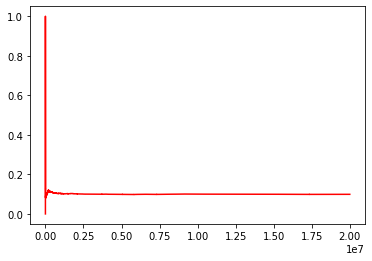

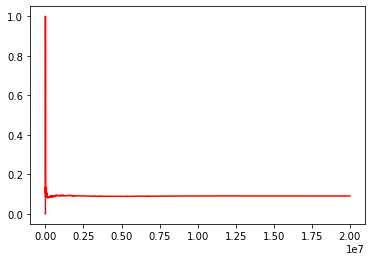

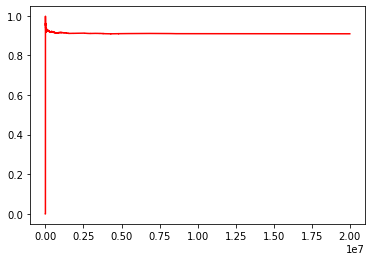

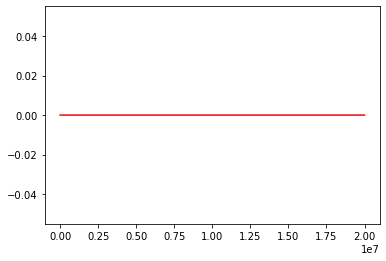

In [101]:
iterations = np.arange(0,N)
for i in target_bits:
    probs = estimate(i)
    plt.plot(iterations,probs,'r-')
    plt.show()